In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import io
print(sklearn.__version__)

1.2.2


In [ ]:
df=pd.read_csv('Thyroid.csv')

In [ ]:
df.head(8)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
5,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803048
6,77,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,21.0,other,-,840803068
7,28,F,f,f,f,f,f,f,f,f,...,116.0,f,NaN,f,NaN,f,NaN,SVI,-,840807019


In [ ]:
df.shape

(9172, 31)

In [ ]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [ ]:
df = df.drop(['patient_id', 'referral_source', 'query_on_thyroxine', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured' ],axis = 1)

In [ ]:
df.isna().sum()

age                       0
sex                     307
on_thyroxine              0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     842
T3                     2604
TT4                     442
T4U                     809
FTI                     802
TBG                    8823
target                    0
dtype: int64

In [ ]:
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

In [ ]:
null_num_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
for col in null_num_columns:
  df[col].fillna(df[col].mean(),inplace=True)

In [ ]:
df.isna().sum()

age                    0
sex                    0
on_thyroxine           0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
TBG                    0
target                 0
dtype: int64

In [ ]:
df.dtypes

age                      int64
sex                     object
on_thyroxine            object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH                    float64
T3                     float64
TT4                    float64
T4U                    float64
FTI                    float64
TBG                    float64
target                  object
dtype: object

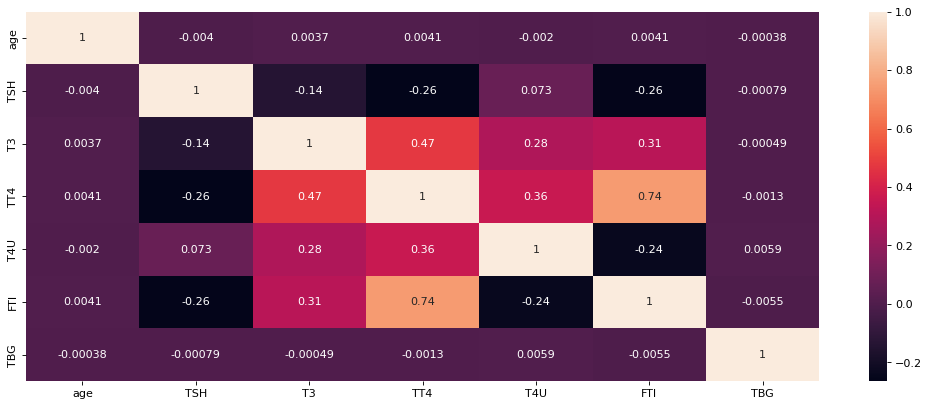

In [ ]:
cor=(df.corr(numeric_only=True))
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [1]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['sex', 'on_thyroxine', 'on_antithyroid_meds',
       'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment',
       'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'target']

# Apply LabelEncoder to each column
for col in columns_to_encode:
    df[col] = labelencoder.fit_transform(df[col])

NameError: name 'df' is not defined

In [ ]:
df.dtypes

age                      int64
sex                      int64
on_thyroxine             int64
on_antithyroid_meds      int64
sick                     int64
pregnant                 int64
thyroid_surgery          int64
I131_treatment           int64
query_hypothyroid        int64
query_hyperthyroid       int64
lithium                  int64
goitre                   int64
tumor                    int64
hypopituitary            int64
psych                    int64
TSH                    float64
T3                     float64
TT4                    float64
T4U                    float64
FTI                    float64
TBG                    float64
target                   int64
dtype: object

In [ ]:
df['target'].unique()

array([ 0, 31,  9,  2, 30, 16, 22, 25, 11, 18,  1, 19, 20, 24, 29, 17,  5,
       26, 21, 15,  6, 13, 23, 28, 10,  3, 12,  4, 14, 27,  7,  8])

In [ ]:
features = ['age', 'sex', 'on_thyroxine', 'on_antithyroid_meds', 'sick',
            'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
            'query_hyperthyroid', 'lithium','goitre', 'tumor', 'hypopituitary',
            'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.70)

In [ ]:
X_train = train[features]
Y_train = train['target']

X_test = test[features]
Y_test = test['target']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline

In [ ]:
model = RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [ ]:
model.score(X_test, Y_test)

0.9364098837209303

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)

[0 1 0 ... 0 0 0]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2052
           1       0.76      0.82      0.79        45
           2       0.78      0.70      0.74        20
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           9       0.91      0.98      0.95        62
          10       0.00      0.00      0.00         2
          11       0.98      1.00      0.99       103
          12       1.00      0.67      0.80         3
          13       0.64      1.00      0.78         9
          15       0.00      0.00      0.00         5
          16       0.86      0.77      0.81       101
          17       1.00      0.50      0.67         6
          18       0.78      0.95      0.86       136
          19       0.67      1.00      0.80         2
          20       0.56      0.67      0.61        30
          21       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)


Text(58.222222222222214, 0.5, 'real')

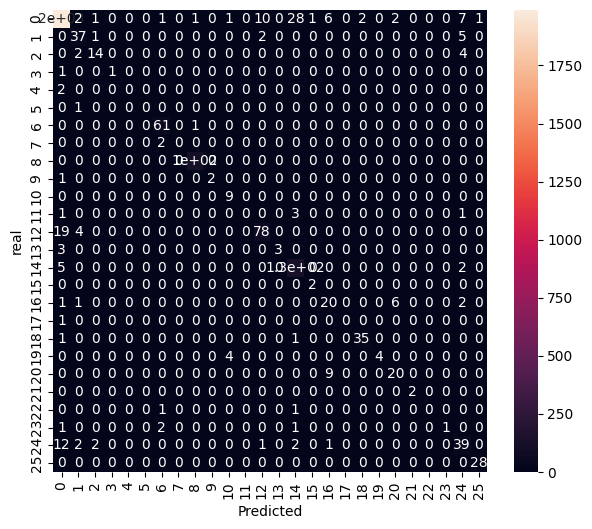

In [ ]:
plt.figure(figsize =(7,6))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [ ]:
score = accuracy_score(Y_test, Y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  93.64 %,  2577.0 correct detections
Inaccuracy:  6.36 %,  175.0 Incorrect detections


**Map Predicted Integers Back to Labels**

In [ ]:
#mapping from integer to thyroid condition labels
int_to_label = {
    0: '-', 1: 'A', 2: 'AK', 3: 'B', 4: 'C', 5: 'C|I', 6: 'D', 7: 'D|R', 8: 'E',
    9: 'F', 10: 'FK', 11: 'G', 12: 'GI', 13: 'GK', 14: 'GKJ', 15: 'H|K', 16: 'I',
    17: 'J', 18: 'K', 19: 'KJ', 20: 'L', 21: 'LJ', 22: 'M', 23: 'MI', 24: 'MK',
    25: 'N', 26: 'O', 27: 'OI', 28: 'P', 29: 'Q', 30: 'R', 31: 'S', 32: 'T'
}

#mapping from labels to descriptive names
label_to_name = {
    '-': 'No thyroid condition',
    'A': 'hyperthyroid',
    'B': 'T3 toxic',
    'C': 'toxic goitre',
    'C|I': 'toxic goitre with increased binding protein',
    'D': 'secondary toxic',
    'D|R': 'secondary toxic with discordant assay results',
    'E': 'hypothyroid',
    'F': 'primary hypothyroid',
    'FK': 'primary hypothyroid with concurrent non-thyroidal illness',
    'G': 'compensated hypothyroid',
    'GI': 'compensated hypothyroid with increased binding protein',
    'GK': 'compensated hypothyroid with concurrent non-thyroidal illness',
    'GKJ': 'compensated hypothyroid with concurrent non-thyroidal illness and decreased binding protein',
    'H|K': 'secondary hypothyroid with concurrent non-thyroidal illness',
    'I': 'increased binding protein',
    'J': 'decreased binding protein',
    'K': 'concurrent non-thyroidal illness',
    'KJ': 'concurrent non-thyroidal illness with decreased binding protein',
    'L': 'consistent with replacement therapy',
    'LJ': 'consistent with replacement therapy with decreased binding protein',
    'M': 'underreplaced',
    'MI': 'underreplaced with increased binding protein',
    'MK': 'underreplaced with concurrent non-thyroidal illness',
    'N': 'overreplaced',
    'O': 'antithyroid drugs',
    'OI': 'antithyroid drugs with increased binding protein',
    'P': 'I131 treatment',
    'Q': 'surgery',
    'R': 'discordant assay results',
    'S': 'elevated TBG',
    'T': 'elevated thyroid hormones',
    'AK': 'hyperthyroid with concurrent non-thyroidal illness',
    'LJ': 'consistent with replacement therapy with decreased binding protein',
    'C|I': 'toxic goitre with increased binding protein',
    'H|K': 'secondary hypothyroid with concurrent non-thyroidal illness',
    'GKJ': 'compensated hypothyroid with concurrent non-thyroidal illness and decreased binding protein'
}

In [ ]:
df.loc[721]

age                     76.000000
sex                      1.000000
on_thyroxine             0.000000
on_antithyroid_meds      0.000000
sick                     0.000000
pregnant                 0.000000
thyroid_surgery          0.000000
I131_treatment           0.000000
query_hypothyroid        0.000000
query_hyperthyroid       0.000000
lithium                  0.000000
goitre                   0.000000
tumor                    0.000000
hypopituitary            0.000000
psych                    0.000000
TSH                      2.100000
T3                       0.400000
TT4                     88.000000
T4U                      0.860000
FTI                    102.000000
TBG                     29.870057
target                  18.000000
Name: 721, dtype: float64

In [ ]:
input_data = (
    32.000000,
    0.000000,
    0.000000,
    0.000000,
    0.000000,
    0.000000,
    0.000000,
    0.000000,
    0.000000,
    0.000000,
    0.000000,
    0.000000,
    0.000000,
    0.000000,
    0.000000,
    5.218403,
    1.970629,
    108.700305,
    0.976056,
    113.640746,
    36.000000
)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
label = int_to_label[prediction[0]]
condition_name = label_to_name[label]

if condition_name == 'No':
  print(condition_name)
else:
  print("Thyroid detected and the condition/type is :", condition_name)

Thyroid detected and the condition/type is : elevated TBG


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Saving the trained model**

In [ ]:
import pickle

In [ ]:
filename = 'Thyroid_model.sav'
pickle.dump(model, open(filename, 'wb'))

**Loading the saved model**

In [ ]:
loaded_model = pickle.load(open('Thyroid_model.sav', 'rb'))

In [ ]:
for columns in df.columns:
  print(columns)

age
sex
on_thyroxine
on_antithyroid_meds
sick
pregnant
thyroid_surgery
I131_treatment
query_hypothyroid
query_hyperthyroid
lithium
goitre
tumor
hypopituitary
psych
TSH
T3
TT4
T4U
FTI
TBG
target
